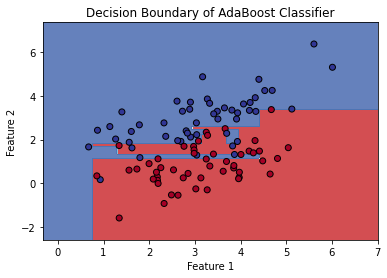

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=1)
X += 2 * np.random.uniform(size=X.shape)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model
ada.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary of AdaBoost Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
